<a href="https://colab.research.google.com/github/gulabpatel/OCR/blob/main/07%3A%20OCR_techniques_and_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am trying to solve the problem in two ways...

* In the first way, I  have used pre-trained spacy model and over the pre-trained model performing some pre-training to improve the performance.

* In the second way, I am creating a from scratch, trained over the dataset available on internet and then tested over the given dataset.

#Method 1: Spacy

##Pytesseract

In [ ]:
!sudo apt install tesseract-ocr
!pip install -U git+https://github.com/madmaze/pytesseract.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,402 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

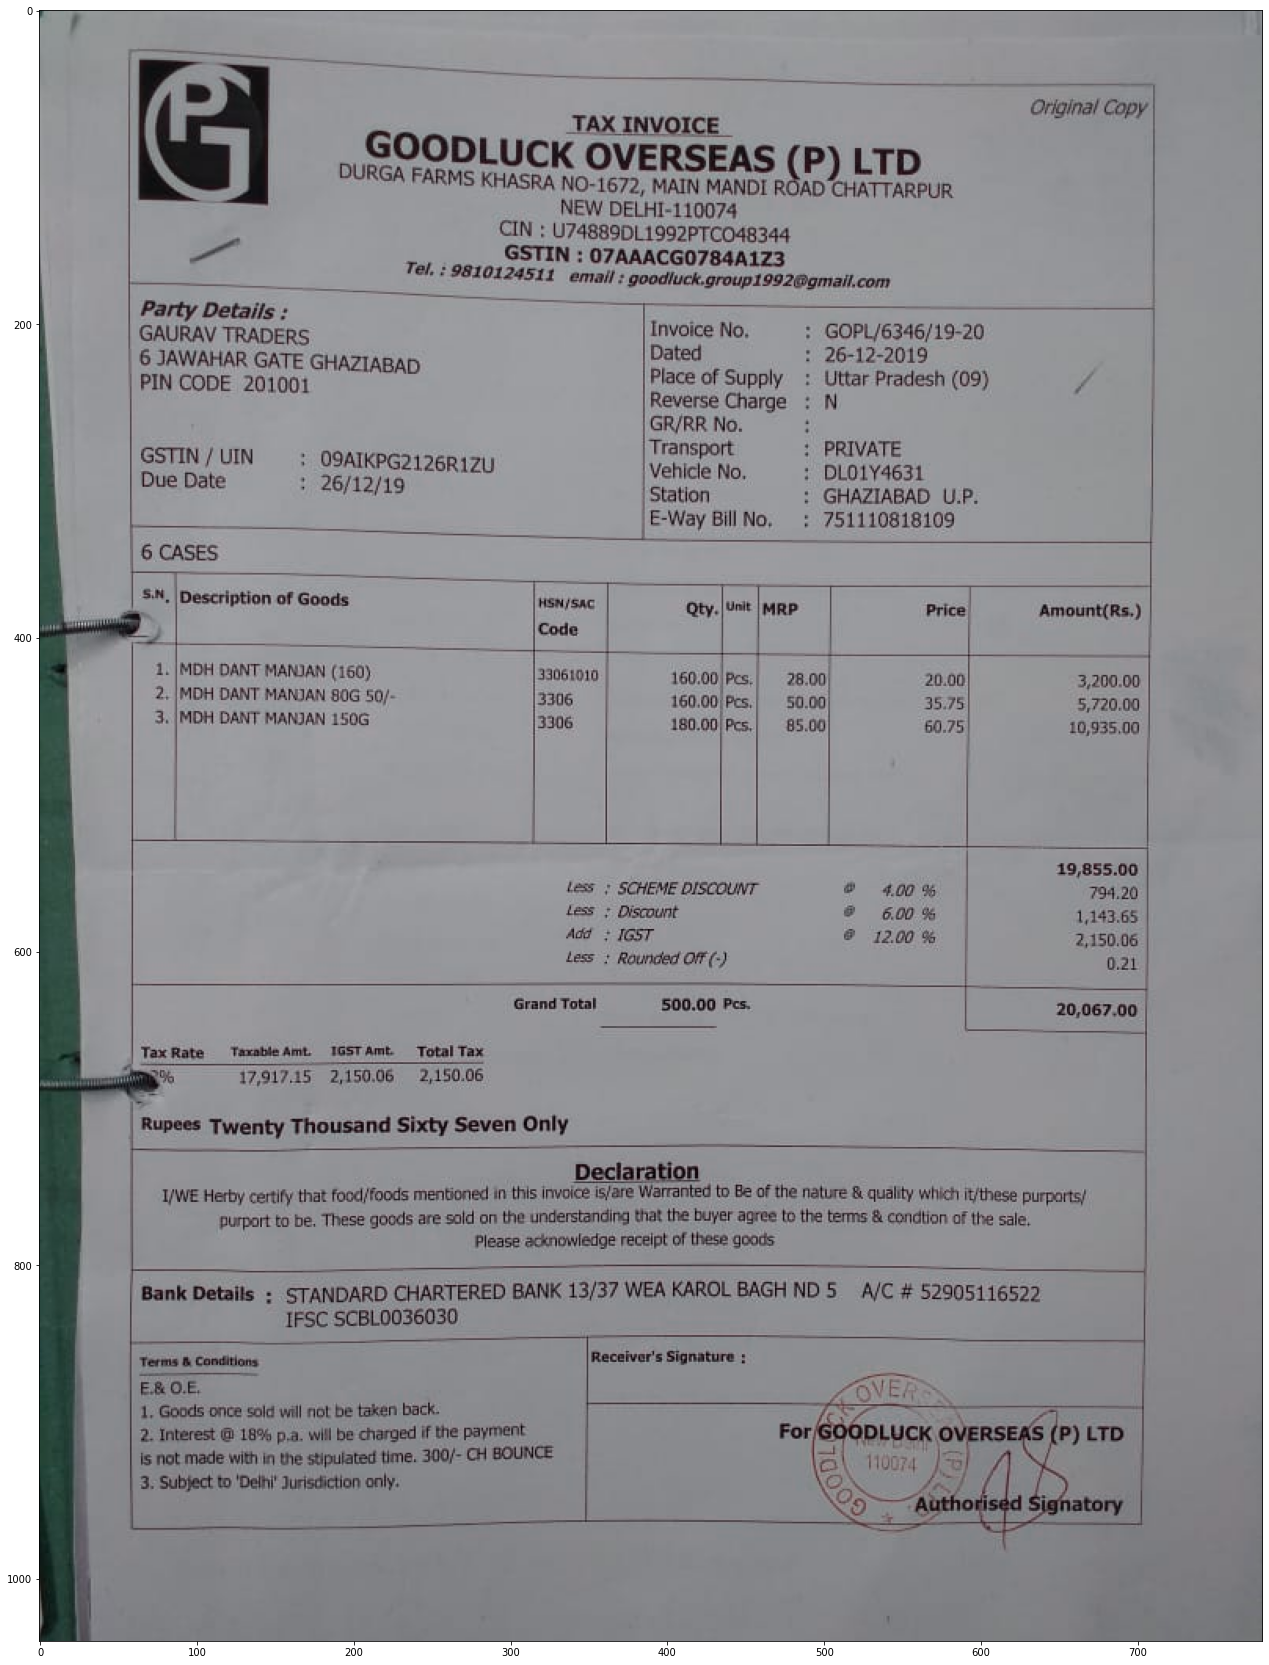

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import pytesseract

im = cv2.imread("/content/1.jpeg", cv2.IMREAD_COLOR)

plt.rcParams["figure.figsize"] = (30,30)
plt.imshow(im)

plt.show()

In [ ]:
# Simple image to string
print(pytesseract.image_to_string(Image.open("/content/1.jpeg")))

Original Copy

 

_TAX INVOICE _
»SOODLUCK OVERSEAS (P) LTD
RGA FARMS KHASRA NO-1672, MAIN MANDI ROAD ‘CHATTARPUR
NEW DELHI-110074
CIN : U748890L1992PTCO48344

  
  
  
 
  
   
  
  
   
   

 

 

 

 

 

 

 

 

 

 

Ea GSTIN : 07AAACGO784A123
oe Tel, 9810124511 email: goodluck group1992Ggmeil.com
Entigeatien Invoice No, GOPL/6346/19-20
Dated 26-12-2019
G JAWAHAR GATE GHAZIABAD Place of Supply: Uttar Pradesh (09) /
Bee ete Reverse Charge : N
GR/RRNo.
Transport + PRIVATE
GSTIN / UIN OSATKPG2126R1ZU | Vehicle No, DLO1Y4631
Due Date + 26/12/19 | Station + GHAZIABAD U.P.
E-Way Bill No, : 751110818109
6 CASES
5%, |Description of Goods swiss ty. lo ore Price] Amount(Rs.)
» code
1. MDH DANT MANIAN (160) |33061010 160.00)Pcs.| 28.00) 20.00) 3,200.00
2, {MOH DANT MANIAN 806 50) 3306 160.00/Pcs,) 50.00] 3575 5,720.00
3, [MDH DANT MANDAN 1506 306 180.00|Rcs| 95.00 50.75 10:935.00
- 19,855.00
les SCHEME DISCOUNT 2 400% 794.20
ess } Discount 2 60% 1,143.65
Aad + 1657 @ 20% 2,150.08
ess : Roun

In [ ]:
# Get verbose data including boxes, confidences, line and page numbers
print(pytesseract.image_to_data(Image.open("/content/1.jpeg")))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	780	1040	-1	
2	1	1	0	0	0	632	57	75	12	-1	
3	1	1	1	0	0	632	57	75	12	-1	
4	1	1	1	1	0	632	57	75	12	-1	
5	1	1	1	1	1	632	57	43	12	59	Original
5	1	1	1	1	2	679	57	28	12	95	Copy
2	1	2	0	0	0	83	23	57	36	-1	
3	1	2	1	0	0	83	23	57	36	-1	
4	1	2	1	1	0	83	23	57	36	-1	
5	1	2	1	1	1	83	23	57	36	95	 
2	1	3	0	0	0	192	67	390	82	-1	
3	1	3	1	0	0	192	67	390	82	-1	
4	1	3	1	1	0	336	67	106	14	-1	
5	1	3	1	1	1	336	67	31	12	52	_TAX
5	1	3	1	1	2	362	68	63	13	67	INVOICE
5	1	3	1	1	3	426	68	16	13	65	_
4	1	3	1	2	0	192	77	370	32	-1	
5	1	3	1	2	1	192	77	149	31	0	»SOODLUCK
5	1	3	1	2	2	349	84	106	19	93	OVERSEAS
5	1	3	1	2	3	455	86	55	23	92	(P)
5	1	3	1	2	4	520	88	42	17	96	LTD
4	1	3	1	3	0	209	99	373	21	-1	
5	1	3	1	3	1	209	99	24	11	59	RGA
5	1	3	1	3	2	238	100	39	12	92	FARMS
5	1	3	1	3	3	282	103	46	12	89	KHASRA
5	1	3	1	3	4	333	106	53	13	90	NO-1672,
5	1	3	1	3	5	391	107	30	10	96	MAIN
5	1	3	1	3	6	426	108	38	10	94	MANDI
5	1	3	1	3	7	469	108

## EasyOCR

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
reader = easyocr.Reader(['en']) #easyocr supports a number of languague

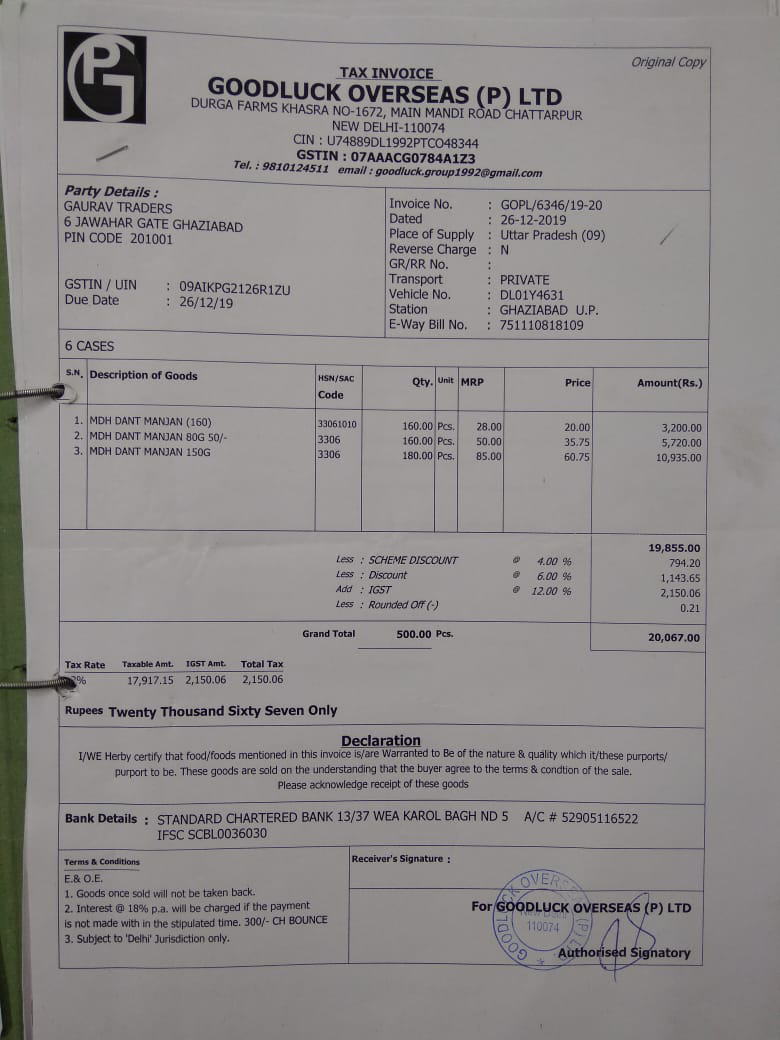

In [ ]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("/content/1.jpeg")
im

In [ ]:
bounds = reader.readtext('/content/1.jpeg')
bounds

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[631, 55], [709, 55], [709, 71], [631, 71]],
  'Origlnal Copy',
  0.9498702967771976),
 ([[337, 63], [437, 63], [437, 83], [337, 83]],
  'IAX INVOICE',
  0.7673111555799269),
 ([[188, 94], [236, 94], [236, 114], [188, 114]], 'DURGA', 0.9999371982135624),
 ([[202, 70], [348, 70], [348, 109], [202, 109]],
  'GOODLUCK',
  0.8613471680860181),
 ([[237, 99], [331, 99], [331, 117], [237, 117]],
  'FARMS KHASRA',
  0.9993587490301594),
 ([[343, 79], [565, 79], [565, 115], [343, 115]],
  'OVERSEAS (P) LTD',
  0.71711929004933),
 ([[329, 100], [586, 100], [586, 124], [329, 124]],
  'NO-1672, MAIN MANDI ROAD CHATTARPUR',
  0.7375293876302148),
 ([[331, 119], [447, 119], [447, 135], [331, 135]],
  'NEW DELHI-110074',
  0.887634879595139),
 ([[293, 133], [317, 133], [317, 147], [293, 147]], 'CIN', 0.9998666173429581),
 ([[324, 132], [481, 132], [481, 152], [324, 152]],
  'U74889DL1992PTCO48344',
  0.6438765376548232),
 ([[295, 147], [341, 147], [341, 163], [295, 163]],
  'GSTIN',
  0.9632299321

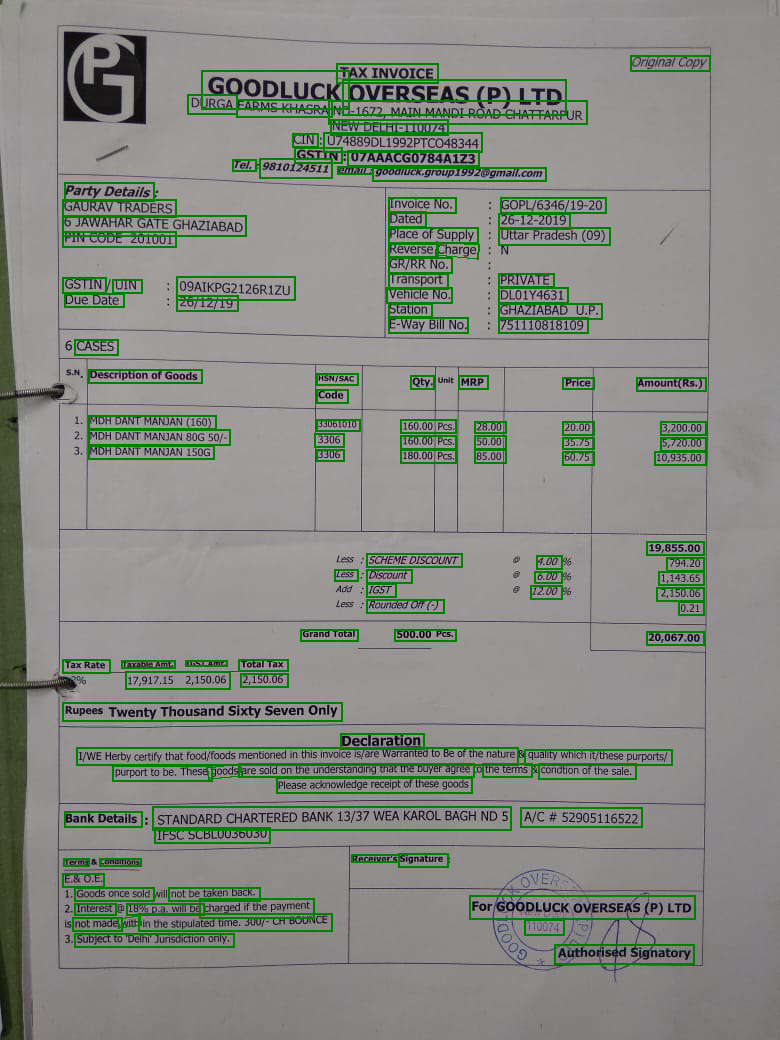

In [ ]:
def draw_boxes(image, bounds, color='green', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [ ]:
#Iterate through the bounding box
text_easyocr1=''
for i in range(len(bounds)):
  text_easyocr1 = text_easyocr1 + bounds[i][1] +'\n'

print(text_easyocr1)

Origlnal Copy
IAX INVOICE
DURGA
GOODLUCK
FARMS KHASRA
OVERSEAS (P) LTD
NO-1672, MAIN MANDI ROAD CHATTARPUR
NEW DELHI-110074
CIN
U74889DL1992PTCO48344
GSTIN
OZAAACGO784A1Z3
Tel
9810124511
nkn
goodluck group199zcgmallcom
Party Details
GAURAV TRADERS
[nvoice No.
GOPL/6346/19-20
6 JAWAHAR GATE GHAZIABAD
Dated
26-12-2019
PIN CODE 201001
Place of Supply
Uttar Pradesh (09)
Reverse
GR/RR No:
GSTIN
UIN
O9AIKPG2IZ6RIZU
Transport
PRIVATE
Due Date
26/12/19
Vehlcle No,
DLO [Y4631
Stalion
GHAZIABAD U.P:
E-Way Bill No_
751110818109
CASES
Description of Goods
Hsnisac
Qty
MRP
Price
Amount(Rs,)
Code
MDH DANT MANJAN ( 160}
3306[010
160.00 Pcs;
78.00|
20.00|
3,200.00
MDH DANT MANJAN 8OG 5o/=
[3306
160,00 Pcs;
50.00|
35.75
5,720,00
MDH DANT MANJAN 1S0G
3J0G
180.00 Pcs,
85.00|
60.75
10,935,00
19,855.00
SCHEME DISCOUNT
#.00
794.20
Less
Discount
6.00
1,143.65
IGST
12.00
2,150,06
Rourided Of (-}
0.21
Grand Total
500.00 Pcs:
20,067.00 
Tax Rate
TarabeAmb
Iigteamf
Tobal Tax
17,917.15   2,150,06
2,150.06
Rupees T

**EasyOCR tunning**

In [ ]:
bounds = reader.readtext('/content/1.jpeg', contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.15, width_ths=0.2, decoder='beamsearch')
bounds

[([[630, 54], [710, 54], [710, 72], [630, 72]],
  'Orlglnal Copy',
  0.7495923217177544),
 ([[336, 62], [438, 62], [438, 84], [336, 84]],
  'IAX INVOICE',
  0.8759546792068462),
 ([[187, 93], [237, 93], [237, 115], [187, 115]], 'DURGA', 0.99991832559933),
 ([[201, 69], [349, 69], [349, 110], [201, 110]],
  "UGOODLUCK'",
  0.5588673118284855),
 ([[236, 98], [332, 98], [332, 118], [236, 118]],
  'FARMS KHASRA',
  0.9992115760885575),
 ([[342, 78], [566, 78], [566, 116], [342, 116]],
  'LOVERSEAS (P) LTD',
  0.3663386027253063),
 ([[328, 99], [587, 99], [587, 125], [328, 125]],
  'NO-1672, MAIN MANDI ROAD CHATTARPUR',
  0.7695572637781888),
 ([[330, 118], [448, 118], [448, 136], [330, 136]],
  'NEW DELHI-110074',
  0.7952286456742395),
 ([[293, 133], [317, 133], [317, 147], [293, 147]], 'CIN', 0.9998666173429581),
 ([[323, 131], [482, 131], [482, 153], [323, 153]],
  'U748890L1992PTCO48344',
  0.8024367776425547),
 ([[294, 146], [342, 146], [342, 164], [294, 164]],
  'GSTIN',
  0.99972629

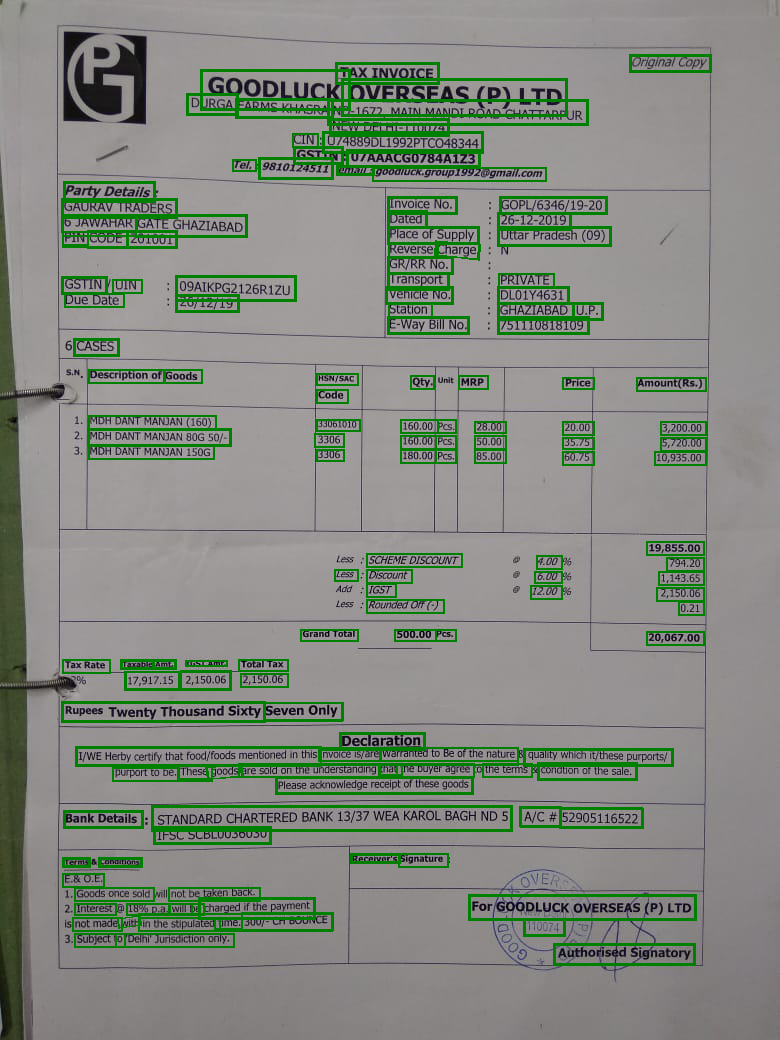

In [ ]:
def draw_boxes(image, bounds, color='green', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [ ]:
#Iterate through the bounding box
text_easyocr2=''
for i in range(len(bounds)):
  text_easyocr2 = text_easyocr2 + bounds[i][1] +'\n'

print(text_easyocr2)

Orlglnal Copy
IAX INVOICE
DURGA
UGOODLUCK'
FARMS KHASRA
LOVERSEAS (P) LTD
NO-1672, MAIN MANDI ROAD CHATTARPUR
NEW DELHI-110074
CIN
U748890L1992PTCO48344
GSTIN
O7AAACGO784A1Z3
Tel
9810124511
enall :
goodluck group199zcgmallcom
Party Details
GAURAV TRADERS
[nvoice No.
GOPL/6346/19-20
6 JAWAHAR
GATE GHAZIABAD
Dated
26-12-2019
PIN
CODE
201001
Place of Supply
Uttar Pradesh (09)
Reverse
GR/RR No:
GSTIN
UIN
O9AIKPGZIZ6RIZU
Transport
PRIVATE
Due Date
26/12/19
Vehlcle No.
DLOLY4631
Stalion
GHAZIABAD
U.P:
E-Way Bill No.
751110818109
CASES
Description of
Goods
Hsnisac
Qty
MRP
Price
Amount(Rs,)
Code
MDH DANT MANJAN ( 160}
3306[010
160.00|
78.00|
20.00|
3,200.00
MDH DANT MANJAN 8OG 50/-
[3306
160,00
50.00|
35.75
5,720,00
MDH DANT MANJAN 1S0G
3J0G
180.00
85.00|
60.75
10,935,00
19,855.00
SCHEME DISCOUNT
#.00
794.20
Less
Discount
6.00
1,143.65
IGST
12.00
2,150,06
Rourided Of (-}
0.21
Grand Total
500.00
20,067.00
Tax Rate
Tarabie
mL
Igstamr
Tobal Tax
17,917.15
2,150,06
2,150.06
Rupees Twenty Thousand S

In [ ]:
text_easyocr2 = ' '.join(text_easyocr2.split('\n'))
text_easyocr2

'Orlglnal Copy IAX INVOICE DURGA UGOODLUCK\' FARMS KHASRA LOVERSEAS (P) LTD NO-1672, MAIN MANDI ROAD CHATTARPUR NEW DELHI-110074 CIN U748890L1992PTCO48344 GSTIN O7AAACGO784A1Z3 Tel 9810124511 enall : goodluck group199zcgmallcom Party Details GAURAV TRADERS [nvoice No. GOPL/6346/19-20 6 JAWAHAR GATE GHAZIABAD Dated 26-12-2019 PIN CODE 201001 Place of Supply Uttar Pradesh (09) Reverse GR/RR No: GSTIN UIN O9AIKPGZIZ6RIZU Transport PRIVATE Due Date 26/12/19 Vehlcle No. DLOLY4631 Stalion GHAZIABAD U.P: E-Way Bill No. 751110818109 CASES Description of Goods Hsnisac Qty MRP Price Amount(Rs,) Code MDH DANT MANJAN ( 160} 3306[010 160.00| 78.00| 20.00| 3,200.00 MDH DANT MANJAN 8OG 50/- [3306 160,00 50.00| 35.75 5,720,00 MDH DANT MANJAN 1S0G 3J0G 180.00 85.00| 60.75 10,935,00 19,855.00 SCHEME DISCOUNT #.00 794.20 Less Discount 6.00 1,143.65 IGST 12.00 2,150,06 Rourided Of (-} 0.21 Grand Total 500.00 20,067.00 Tax Rate Tarabie mL Igstamr Tobal Tax 17,917.15 2,150,06 2,150.06 Rupees Twenty Thousand

## Keras-OCR

Performs good for alphabet

In [ ]:
## To install from PyPi
# !pip install -q keras-ocr

In [ ]:
# import matplotlib.pyplot as plt
# import keras_ocr
# import cv2
# pipeline = keras_ocr.pipeline.Pipeline()

In [ ]:
# images = [
#     keras_ocr.tools.read(images) for images in [
#         '1.jpeg'
#         #'2.jpeg'
#     ]
# ]

In [ ]:
# prediction = pipeline.recognize(images)

In [ ]:
# fig, axs = plt.subplots(nrows=1, figsize=(20, 20))
# keras_ocr.tools.drawAnnotations(image=images[0], 
#                                 predictions=prediction[0], 
#                                 ax=axs)

In [ ]:
# predicted = [text for text, box in prediction[0]]
# # text=''
# # for i in range(len(predicted)):
# #   text = text + ' ' + predicted[i] 
# # text

# text = ' '.join(predicted)
# text

##MMOCR

need more time to understand the library

In [ ]:
#!pip install torch==1.9.0 torchvision==0.8.2 torchaudio==0.7.2

In [ ]:
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.1/index.html

In [ ]:
# !pip install mmdet==2.11.0

In [ ]:
# !git clone https://github.com/open-mmlab/mmocr.git

In [ ]:
# pwd

In [ ]:
# %cd /content/mmocr

In [ ]:
# pwd

In [ ]:
# !pip install -r requirements.txt
# !pip install -v -e .

In [ ]:
# !pip install Pillow==7.0.0

In [ ]:
# # Check Pytorch installation
# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())

# # Check MMDetection installation
# import mmdet
# print(mmdet.__version__)

# # Check mmcv installation
# import mmcv
# from mmcv.ops import get_compiling_cuda_version, get_compiler_version
# print(mmcv.__version__)
# print(get_compiling_cuda_version())
# print(get_compiler_version())

# # Check mmocr installation
# import mmocr
# print(mmocr.__version__)

In [ ]:
# !python demo/image_demo.py demo/demo_text_recog.jpg configs/textrecog/sar/sar_r31_parallel_decoder_academic.py https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth outputs/demo_text_recog_pred.jpg

In [ ]:
# !python demo/ocr_image_demo.py /content/2.jpeg demo/output.jpg

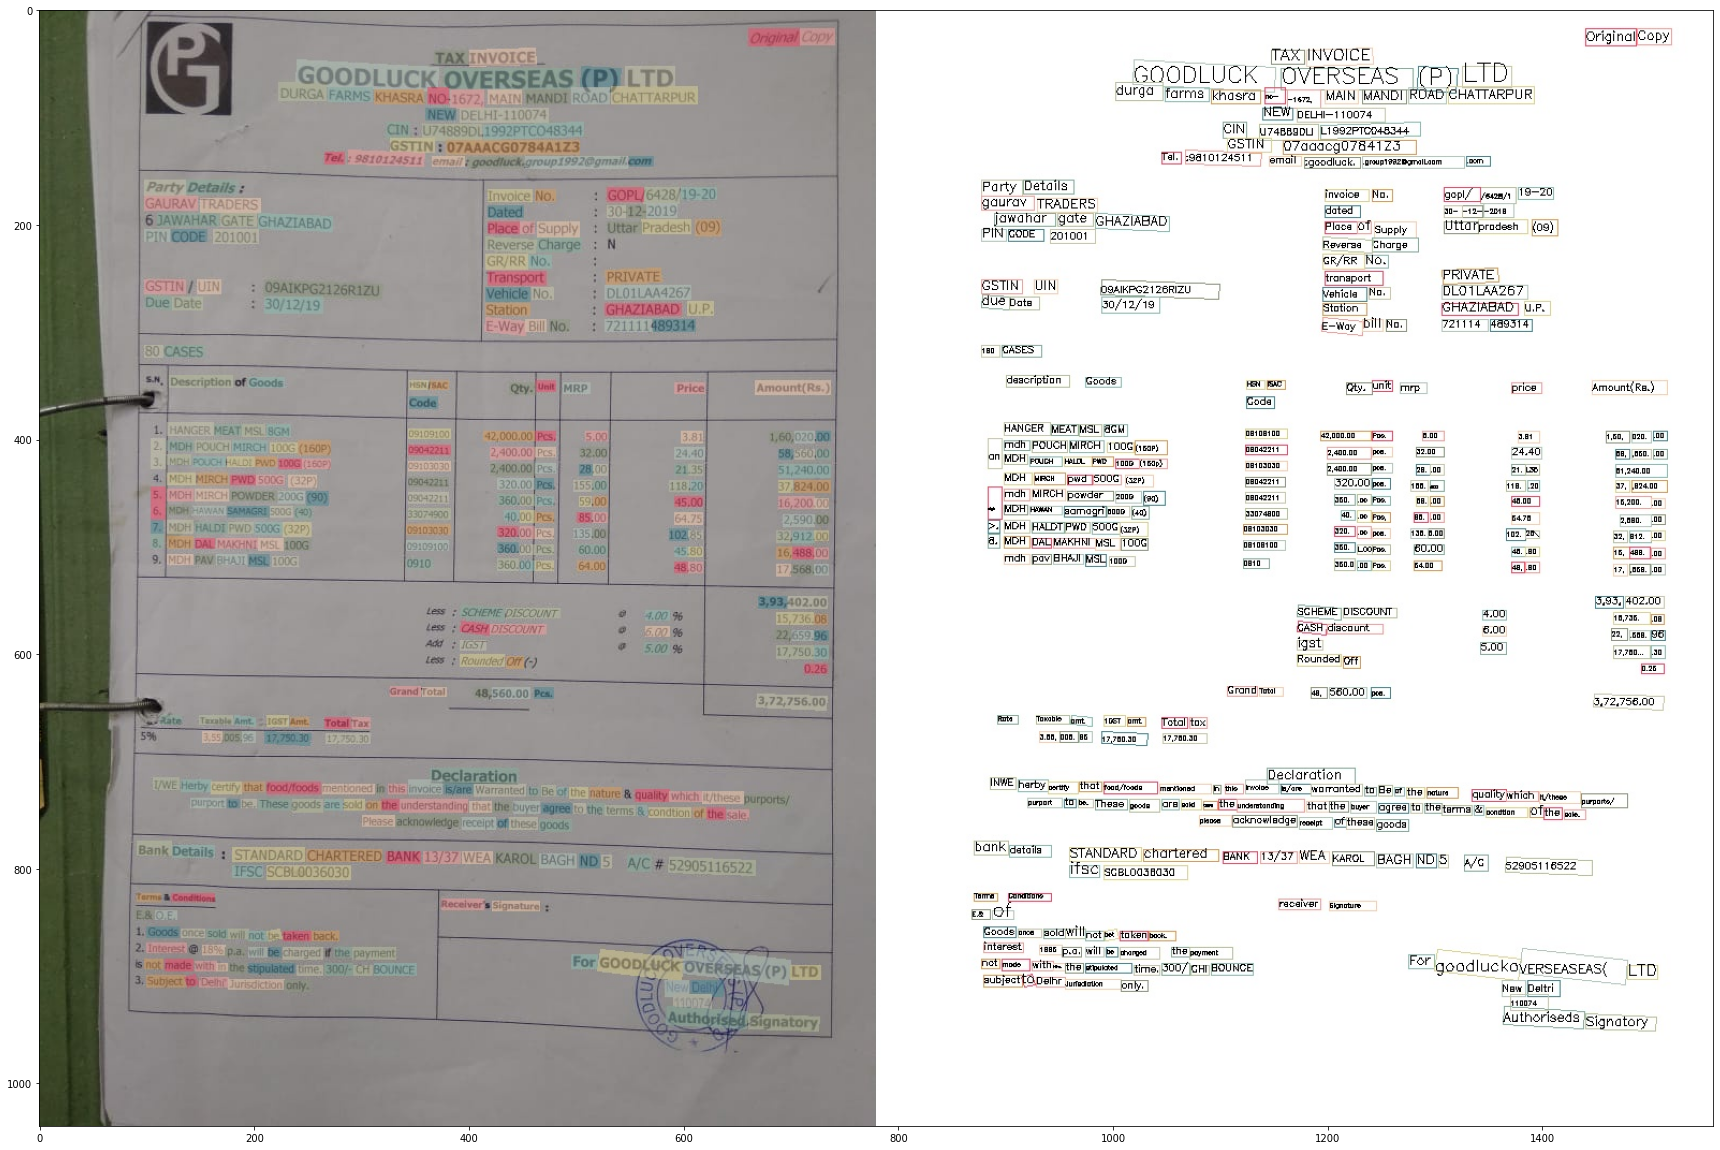

In [ ]:
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (30,30)
# predicted_img = mmcv.imread('demo/output.jpg')

# plt.imshow(mmcv.bgr2rgb(predicted_img))
# plt.show()

##Vizualize the named entity using spacy

In [ ]:
import spacy

In [ ]:
nlp=spacy.load('en_core_web_sm') ##spacy.load('en_core_web_lg')

In [ ]:
doc = nlp(text_easyocr2)

In [ ]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)

In [ ]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

MAIN 83 87 ORG
ROAD CHATTARPUR 94 109 FAC
9810124511 179 189 DATE
goodluck group199zcgmallcom Party Details 198 239 ORG
GOPL/6346/19-20 267 282 CARDINAL
26 314 316 CARDINAL
09 372 374 CARDINAL
Reverse GR 376 386 PERSON
160 613 616 CARDINAL
160.00| 627 634 CARDINAL
3,200.00 649 657 CARDINAL
3306 684 688 CARDINAL
160,00 689 695 PRODUCT
35.75 703 708 CARDINAL
5,720,00 709 717 CARDINAL
MDH 718 721 ORG
1S0 734 737 CARDINAL
3J0 739 742 CARDINAL
180.00 744 750 CARDINAL
60.75 758 763 CARDINAL
#.00 800 804 MONEY
794.20 805 811 CARDINAL
6.00 1,143.65 826 839 CARDINAL
IGST 840 844 ORG
12.00 2,150,06 845 859 CARDINAL
Grand Total 881 892 ORG
500.00 893 899 CARDINAL
17,917.15 2,150,06 2,150.06 948 975 MONEY
Twenty Thousand Sixty Seven 983 1010 MONEY
tens 1233 1237 CARDINAL
Ike 1251 1254 PERSON
Ihese gcnus Bank Details STANDARD 1291 1324 ORG
13/37 1340 1345 CARDINAL
WEA 1346 1349 ORG
5 NC # 52905116522 1364 1382 MONEY
GOODLUCK OVERSEAS 1524 1541 ORG
Ftme 1577 1581 ORG
30/- 1583 1587 CARDINAL
11007 15

Explanation??


##Training

In [ ]:
text = str(text_easyocr2)
text

'Orlglnal Copy IAX INVOICE DURGA UGOODLUCK\' FARMS KHASRA LOVERSEAS (P) LTD NO-1672, MAIN MANDI ROAD CHATTARPUR NEW DELHI-110074 CIN U748890L1992PTCO48344 GSTIN O7AAACGO784A1Z3 Tel 9810124511 enall : goodluck group199zcgmallcom Party Details GAURAV TRADERS [nvoice No. GOPL/6346/19-20 6 JAWAHAR GATE GHAZIABAD Dated 26-12-2019 PIN CODE 201001 Place of Supply Uttar Pradesh (09) Reverse GR/RR No: GSTIN UIN O9AIKPGZIZ6RIZU Transport PRIVATE Due Date 26/12/19 Vehlcle No. DLOLY4631 Stalion GHAZIABAD U.P: E-Way Bill No. 751110818109 CASES Description of Goods Hsnisac Qty MRP Price Amount(Rs,) Code MDH DANT MANJAN ( 160} 3306[010 160.00| 78.00| 20.00| 3,200.00 MDH DANT MANJAN 8OG 50/- [3306 160,00 50.00| 35.75 5,720,00 MDH DANT MANJAN 1S0G 3J0G 180.00 85.00| 60.75 10,935,00 19,855.00 SCHEME DISCOUNT #.00 794.20 Less Discount 6.00 1,143.65 IGST 12.00 2,150,06 Rourided Of (-} 0.21 Grand Total 500.00 20,067.00 Tax Rate Tarabie mL Igstamr Tobal Tax 17,917.15 2,150,06 2,150.06 Rupees Twenty Thousand

In [ ]:
train = [(
         text, {"entities": [(34,42,"ORG"), (131, 152, "CIN"), (159, 174, "GSTIN"), (179, 189, "MBN"), (198, 225, "EMAIL"),
                             (267, 282, "INVN"), (405, 420, "PGSTIN"), (1524, 1541,"ORG")
        ]})]

In [ ]:
train

[('Orlglnal Copy IAX INVOICE DURGA UGOODLUCK\' FARMS KHASRA LOVERSEAS (P) LTD NO-1672, MAIN MANDI ROAD CHATTARPUR NEW DELHI-110074 CIN U748890L1992PTCO48344 GSTIN O7AAACGO784A1Z3 Tel 9810124511 enall : goodluck group199zcgmallcom Party Details GAURAV TRADERS [nvoice No. GOPL/6346/19-20 6 JAWAHAR GATE GHAZIABAD Dated 26-12-2019 PIN CODE 201001 Place of Supply Uttar Pradesh (09) Reverse GR/RR No: GSTIN UIN O9AIKPGZIZ6RIZU Transport PRIVATE Due Date 26/12/19 Vehlcle No. DLOLY4631 Stalion GHAZIABAD U.P: E-Way Bill No. 751110818109 CASES Description of Goods Hsnisac Qty MRP Price Amount(Rs,) Code MDH DANT MANJAN ( 160} 3306[010 160.00| 78.00| 20.00| 3,200.00 MDH DANT MANJAN 8OG 50/- [3306 160,00 50.00| 35.75 5,720,00 MDH DANT MANJAN 1S0G 3J0G 180.00 85.00| 60.75 10,935,00 19,855.00 SCHEME DISCOUNT #.00 794.20 Less Discount 6.00 1,143.65 IGST 12.00 2,150,06 Rourided Of (-} 0.21 Grand Total 500.00 20,067.00 Tax Rate Tarabie mL Igstamr Tobal Tax 17,917.15 2,150,06 2,150.06 Rupees Twenty Thousa

In [ ]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [ ]:
ner=nlp.get_pipe("ner")

In [ ]:
for _, annotations in train:
  for ent in annotations.get("entities"):
    ner.add_label(ent[2])

In [ ]:
disable_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']

In [ ]:
import random
from spacy.util import minibatch, compounding
from pathlib import Path

with nlp.disable_pipes(*disable_pipes):
  optimizer = nlp.resume_training()

  for iteration in range(100):

    random.shuffle(train)
    losses = {}

    batches = minibatch(train, size=compounding(1.0, 4.0, 1.001))
    for batch in batches:
        text, annotation = zip(*batch)
        nlp.update(
                    text,  
                    annotation, 
                    drop=0.5, 
                    losses=losses,
                    sgd=optimizer
                )
        print("Losses", losses)

Losses {'ner': 333.9859437122941}
Losses {'ner': 325.93662732839584}
Losses {'ner': 324.55933080592877}
Losses {'ner': 327.34639739990234}
Losses {'ner': 315.7631802558899}
Losses {'ner': 316.4543581008911}
Losses {'ner': 317.7923519015312}
Losses {'ner': 331.25716042518616}
Losses {'ner': 327.21313655376434}
Losses {'ner': 303.5098421573639}
Losses {'ner': 302.87076926231384}
Losses {'ner': 281.2111704349518}
Losses {'ner': 319.5373032614589}
Losses {'ner': 302.8893837928772}
Losses {'ner': 297.684893399477}
Losses {'ner': 283.54986274801195}
Losses {'ner': 295.9262981414795}
Losses {'ner': 299.967284321785}
Losses {'ner': 274.559330701828}
Losses {'ner': 298.5727450847626}
Losses {'ner': 255.9845246076584}
Losses {'ner': 283.93887972831726}
Losses {'ner': 278.3235001564026}
Losses {'ner': 254.51437850296497}
Losses {'ner': 268.6264681816101}
Losses {'ner': 271.0528929233551}
Losses {'ner': 271.7611307501793}
Losses {'ner': 273.78361570835114}
Losses {'ner': 284.1116131544113}
Losses 

In [ ]:
for text, _ in train:
    doc = nlp(text)
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])

Entities [('MAIN', 'ORG'), ('ROAD CHATTARPUR', 'FAC'), ('9810124511', 'DATE'), ('goodluck group199zcgmallcom Party Details', 'ORG'), ('GOPL/6346/19-20', 'CARDINAL'), ('26', 'CARDINAL'), ('09', 'CARDINAL'), ('Reverse GR', 'PERSON'), ('160', 'CARDINAL'), ('160.00|', 'CARDINAL'), ('3,200.00', 'CARDINAL'), ('3306', 'CARDINAL'), ('160,00', 'PRODUCT'), ('35.75', 'CARDINAL'), ('5,720,00', 'CARDINAL'), ('MDH', 'ORG'), ('1S0', 'CARDINAL'), ('3J0', 'CARDINAL'), ('180.00', 'CARDINAL'), ('60.75', 'CARDINAL'), ('#.00', 'MONEY'), ('794.20', 'CARDINAL'), ('6.00 1,143.65', 'CARDINAL'), ('IGST', 'ORG'), ('12.00 2,150,06', 'CARDINAL'), ('Grand Total', 'ORG'), ('500.00', 'CARDINAL'), ('17,917.15 2,150,06 2,150.06', 'MONEY'), ('Twenty Thousand Sixty Seven', 'MONEY'), ('tens', 'CARDINAL'), ('Ike', 'PERSON'), ('Ihese gcnus Bank Details STANDARD', 'ORG'), ('13/37', 'CARDINAL'), ('WEA', 'ORG'), ('5 NC # 52905116522', 'MONEY'), ('GOODLUCK OVERSEAS', 'ORG'), ('Ftme', 'ORG'), ('30/-', 'CARDINAL'), ('11007', 'DAT

In [ ]:
from spacy import displacy

doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
displacy.render(nlp(doc.text),style='ent', jupyter=True)    

In [ ]:
nlp=spacy.load('en_core_web_sm') ##spacy.load('en_core_web_lg')

In [ ]:
nlp=spacy.load('en_core_web_sm')
doc = nlp(text)
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)

Catastrophic-forgetting

# Spacy 3.0

Let us look at how we can create a custom Named Entity Recognition model with spaCy. 
Here i will be creating a clinical named entity recognition model which can recognize the disease names from clinical text
For this i have extracted annotated clinical text from the following github repo:https://github.com/dmis-lab/biobert
They provide annotated clinical text here:
Named Entity Recognition: (17.3 MB), 8 datasets on biomedical named entity recognition(https://drive.google.com/open?id=1OletxmPYNkz2ltOr9pyT0b0iBtUWxslh)
Once you download and unzip the files you get 8 datasets with each dataset having the following files:
train.tsv, test.tsv , dev.tsv and devel.tsv
In These tsv files each word is annotated using  the BIO format.
A few lines from  train.tsv in BC5CDR-disease dataset looks like:
Selegiline	O
-	O
induced	O
postural	B
hypotension	I
in	O
Parkinson	B
'	I
s	I
disease	I
:	O
a	O
longitudinal	O
study	O
on	O
the	O
effects	O
of	O
drug	O
withdrawal	O
.	O
Here it is of the format:
word \t label\n
for instance:
postural	B
hypotension	I

here B-> Begin entity, I-> inside entity and O-> outside entity



In [ ]:
pip install spacy==3.0.6

In [ ]:
#Import all required libraries
import spacy
import random
import time
import numpy as np
import sys
from spacy import displacy
from itertools import chain
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator

We have to convert tsv file to the format accepted by spaCy for training.
One of the format supported by spaCy is:
TRAIN_DATA = [[(Sentence, {entities: [(start, end, label)]], ...]

In [ ]:
def load_data_spacy(file_path):
    ''' Converts data from:
    word \t label \n word \t label \n \n word \t label
    to: sentence, {entities : [(start, end, label), (stard, end, label)]}
    '''
    file = open(file_path, 'r')
    training_data, entities, sentence, unique_labels = [], [], [], []
    current_annotation = None
    start =0
    end = 0 # initialize counter to keep track of start and end characters
    for line in file:
        line = line.strip("\n").split("\t")
        # lines with len > 1 are words
        if len(line) > 1:
            label = line[1]
            if(label != 'O'):
                label = line[1]+"_Disease"     # the .txt is formatted: label \t word, label[0:2] = label_type
            #label_type = line[0][0] # beginning of annotations - "B", intermediate - "I"
            word = line[0]
            sentence.append(word)
            start = end
            end += (len(word) + 1)  # length of the word + trailing space
           
            if label == 'I_Disease' :  # if at the end of an annotation
                entities.append(( start,end-1, label))  # append the annotation
                              
            if label == 'B_Disease':                         # if beginning new annotation
                entities.append(( start,end-1, label))# start annotation at beginning of word
                
           
           
            if label != 'O' and label not in unique_labels:
                unique_labels.append(label)
 
        # lines with len == 1 are breaks between sentences
        if len(line) == 1:
            if(len(entities) > 0):
                sentence = " ".join(sentence)
                training_data.append([sentence, {'entities' : entities}])
            # reset the counters and temporary lists
            end = 0 
            start = 0
            entities, sentence = [], []
            
    file.close()
    return training_data, unique_labels   

Let us convert our train data,test data and validation data to spaCy format

In [ ]:
TRAIN_DATA, LABELS = load_data_spacy("/content/train.tsv")
print(TRAIN_DATA)
print(len(TRAIN_DATA))
TEST_DATA, _ = load_data_spacy("/content/test.tsv")
print(len(TEST_DATA))
VALID_DATA, _ = load_data_spacy("/content/train_dev.tsv")
print(len(VALID_DATA))

https://stackoverflow.com/questions/67407433/using-spacy-3-0-to-convert-data-from-old-spacy-v2-format-to-the-brand-new-spacy  The below method is used to convert the train and validation data from old format to new format

In [ ]:
import pandas as pd
from tqdm import tqdm
import spacy
from spacy.tokens import DocBin
nlp = spacy.blank("en") # load a new spacy model
db = DocBin() # create a DocBin object

for text, annot in tqdm(TRAIN_DATA): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label)
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

db.to_disk("./train.spacy") # save the docbin object

db = DocBin()
for text, annot in tqdm(VALID_DATA): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

db.to_disk("./valid.spacy") # save the docbin object

In [ ]:
#Create base config file from here:https://spacy.io/usage/training#quickstart

In [ ]:
!pip install transformers[sentencepiece]

In [ ]:
!pip install -U spacy[cuda102,transformers]

In [ ]:
!python -m spacy init fill-config base_config.cfg config.cfg

Train using CLI

In [ ]:
 !python -m spacy train config.cfg --verbose --output ./ner_demo/training/ --paths.train train.spacy --paths.dev valid.spacy

Lets test our model on  test data

In [ ]:
ner = spacy.load(R"/content/ner_demo/training/model-best") #load the best model



test_sentences = [x[0] for x in TEST_DATA[0:4000]] # extract the sentences from [sentence, entity]
for x in test_sentences:
    doc = ner(x)
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    displacy.render(doc,jupyter=True, style = "ent")
   

In [ ]:
ner = spacy.load(R"/content/ner_demo/training/model-best") #load the best model
doc = ner("Selegiline - induced postural hypotension in Parkinson ' s disease : a longitudinal study on the effects of drug withdrawal.The aims of this study were to confirm our previous findings in a separate cohort of patients and to determine the time course of the cardiovascular consequences of stopping selegiline in the expectation that this might shed light on the mechanisms by which the drug causes orthostatic hypotension")
displacy.render(doc,jupyter=True, style = "ent")

#Method 2: Transformer


In [ ]:
! pip install transformers

In [ ]:
from transformers import pipeline
ner = pipeline("ner")

In [ ]:
ner(text_easyocr2)

[{'end': 27,
  'entity': 'I-ORG',
  'index': 15,
  'score': 0.44484684,
  'start': 26,
  'word': 'D'},
 {'end': 29,
  'entity': 'I-LOC',
  'index': 16,
  'score': 0.418782,
  'start': 27,
  'word': '##UR'},
 {'end': 50,
  'entity': 'I-ORG',
  'index': 29,
  'score': 0.4677016,
  'start': 49,
  'word': 'K'},
 {'end': 52,
  'entity': 'I-LOC',
  'index': 30,
  'score': 0.42789963,
  'start': 50,
  'word': '##HA'},
 {'end': 54,
  'entity': 'I-ORG',
  'index': 31,
  'score': 0.57082206,
  'start': 52,
  'word': '##SR'},
 {'end': 55,
  'entity': 'I-ORG',
  'index': 32,
  'score': 0.89958435,
  'start': 54,
  'word': '##A'},
 {'end': 90,
  'entity': 'I-ORG',
  'index': 52,
  'score': 0.3215704,
  'start': 88,
  'word': 'MA'},
 {'end': 92,
  'entity': 'I-ORG',
  'index': 53,
  'score': 0.71816975,
  'start': 90,
  'word': '##ND'},
 {'end': 242,
  'entity': 'I-ORG',
  'index': 128,
  'score': 0.34495136,
  'start': 240,
  'word': 'GA'},
 {'end': 244,
  'entity': 'I-ORG',
  'index': 129,
  'scor

----------------